In [17]:
from bagpy import bagreader
bagpath = "../data/raw/Sample-Data/Sample-Data.bag"
b = bagreader(bagpath)
print(b.topic_table)

[INFO]  Data folder ../data/raw/Sample-Data/Sample-Data already exists. Not creating.
                Topics                         Types  Message Count  \
0                 /gps         sensor_msgs/NavSatFix           4896   
1            /gps_time     sensor_msgs/TimeReference           4896   
2    /image_front_left             sensor_msgs/Image            326   
3                 /imu               sensor_msgs/Imu           4896   
4     /lidar_blue_scan    velodyne_msgs/VelodyneScan            246   
5    /lidar_green_scan    velodyne_msgs/VelodyneScan            246   
6      /lidar_red_scan    velodyne_msgs/VelodyneScan            246   
7   /lidar_yellow_scan    velodyne_msgs/VelodyneScan            245   
8   /pose_ground_truth     geometry_msgs/PoseStamped           4858   
9      /pose_localized     geometry_msgs/PoseStamped            539   
10           /pose_raw     geometry_msgs/PoseStamped           4872   
11                 /tf            tf2_msgs/TFMessage          

Lets explore some of the data

In [12]:
import pandas as pd
for topic in b.topic_table['Topics']:
    csv = b.message_by_topic(topic)
    df = pd.read_csv(csv)
    print(f"Data from topic '{topic}':")
    print(df.head())

Data from topic '/gps':
           Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0  1.501822e+09           6         1501822123            31317949   
1  1.501822e+09          70         1501822123            39287090   
2  1.501822e+09          89         1501822123            41313886   
3  1.501822e+09         159         1501822123            49295902   
4  1.501822e+09         180         1501822123            51310062   

  header.frame_id  status.status  status.service   latitude  longitude  \
0             gps              0               0  42.305971 -83.244833   
1             gps              0               0  42.305971 -83.244833   
2             gps              0               0  42.305971 -83.244833   
3             gps              0               0  42.305971 -83.244833   
4             gps              0               0  42.305971 -83.244833   

     altitude  position_covariance_0  position_covariance_1  \
0  156.021419                    0.0           

Quick check for differences in pose tables

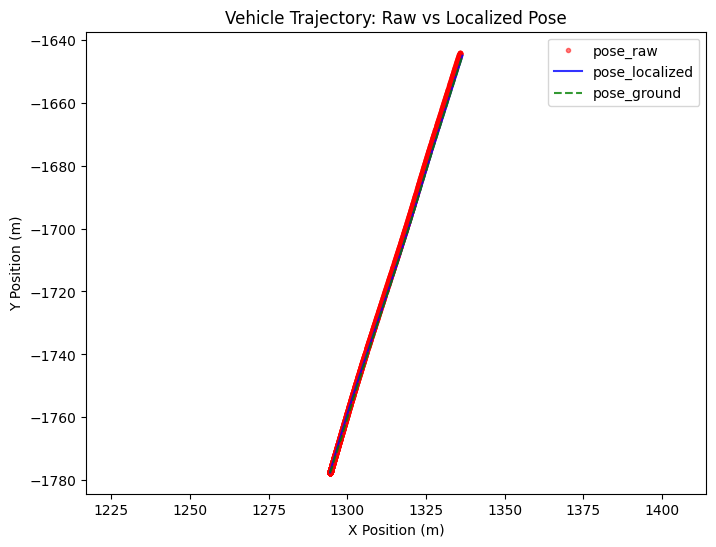

In [ ]:
import matplotlib.pyplot as plt

# Read topics into DataFrames
pose_raw_csv = b.message_by_topic('/pose_raw')
pose_raw = pd.read_csv(pose_raw_csv)

pose_loc_csv = b.message_by_topic('/pose_localized')
pose_loc = pd.read_csv(pose_loc_csv)

pose_ground_csv = b.message_by_topic('/pose_ground_truth')
pose_ground = pd.read_csv(pose_ground_csv)

# Plot X vs Y for each
plt.figure(figsize=(8,6))
plt.plot(pose_raw['pose.position.x'], pose_raw['pose.position.y'], 'r.', alpha=0.5, label='pose_raw')
plt.plot(pose_loc['pose.position.x'], pose_loc['pose.position.y'], 'b-', alpha=0.8, label='pose_localized')
plt.plot(pose_ground['pose.position.x'], pose_ground['pose.position.y'], 'g--', alpha=0.8, label='pose_ground')

plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Vehicle Trajectory: Raw vs Localized Pose")
plt.legend()
plt.axis("equal")
plt.show()


In [14]:
import numpy as np

# Align indices for pose_raw and pose_loc
common_indices = pose_loc.index

# Calculate variance for position (x, y, z) between pose_raw and pose_loc
var_x = np.var(pose_raw.loc[common_indices, 'pose.position.x'] - pose_loc['pose.position.x'])
var_y = np.var(pose_raw.loc[common_indices, 'pose.position.y'] - pose_loc['pose.position.y'])
var_z = np.var(pose_raw.loc[common_indices, 'pose.position.z'] - pose_loc['pose.position.z'])

print(f"Variance in X: {var_x}")
print(f"Variance in Y: {var_y}")
print(f"Variance in Z: {var_z}")

Variance in X: 164.4140197366276
Variance in Y: 1589.2341065536023
Variance in Z: 0.14617264367763752


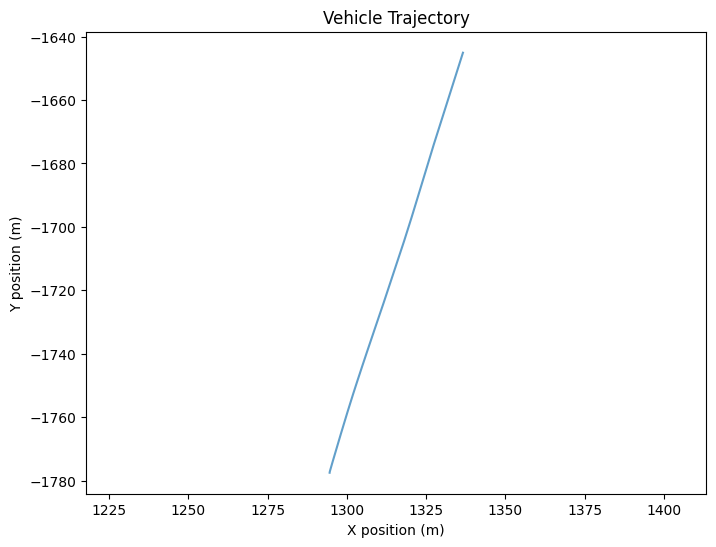

In [ ]:

pose_csv = b.message_by_topic('/pose_localized')  # or '/pose_raw', '/pose'
pose_df = pd.read_csv(pose_csv)


# Plot trajectory
plt.figure(figsize=(8, 6))
plt.plot(pose_df['pose.position.x'], pose_df['pose.position.y'], alpha=0.7)
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")
plt.title("Vehicle Trajectory")
plt.axis("equal")
plt.show()




Index(['Time', 'header.seq', 'header.stamp.secs', 'header.stamp.nsecs',
       'header.frame_id', 'orientation.x', 'orientation.y', 'orientation.z',
       'orientation.w', 'orientation_covariance_0', 'orientation_covariance_1',
       'orientation_covariance_2', 'orientation_covariance_3',
       'orientation_covariance_4', 'orientation_covariance_5',
       'orientation_covariance_6', 'orientation_covariance_7',
       'orientation_covariance_8', 'angular_velocity.x', 'angular_velocity.y',
       'angular_velocity.z', 'angular_velocity_covariance_0',
       'angular_velocity_covariance_1', 'angular_velocity_covariance_2',
       'angular_velocity_covariance_3', 'angular_velocity_covariance_4',
       'angular_velocity_covariance_5', 'angular_velocity_covariance_6',
       'angular_velocity_covariance_7', 'angular_velocity_covariance_8',
       'linear_acceleration.x', 'linear_acceleration.y',
       'linear_acceleration.z', 'linear_acceleration_covariance_0',
       'linear_accelerat

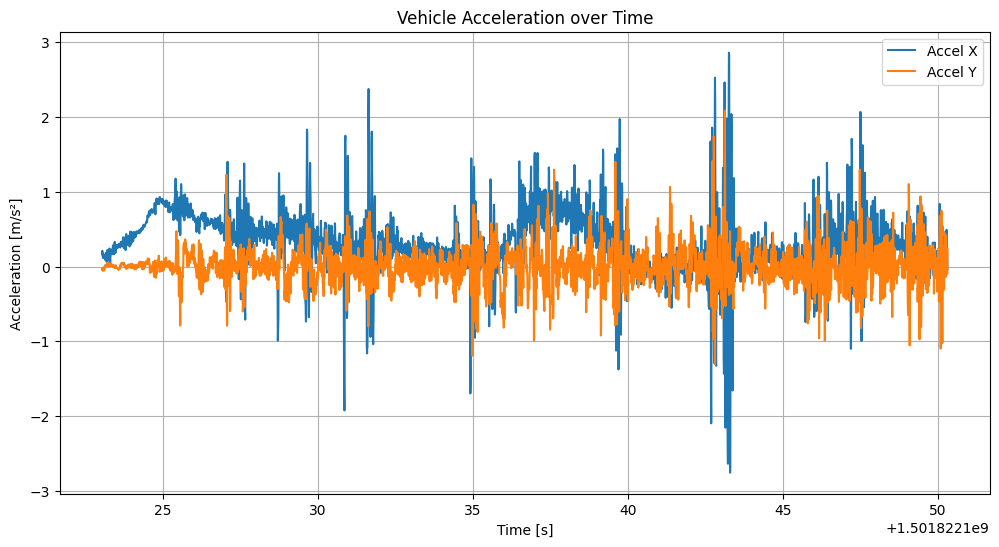

In [ ]:
imu_csv = b.message_by_topic('/imu')

imu_df = pd.read_csv(imu_csv)

# Plot acceleration vs time
plt.figure(figsize=(12,6))
plt.plot(imu_df['Time'], imu_df['linear_acceleration.x'], label='Accel X')
plt.plot(imu_df['Time'], imu_df['linear_acceleration.y'], label='Accel Y')
#plt.plot(imu_df['Time'], imu_df['linear_acceleration.z'], label='Accel Z')

plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s²]')
plt.title('Vehicle Acceleration over Time')
plt.legend()
plt.grid(True)
plt.show()

Clean up and organize data

In [23]:
for topic in b.topic_table['Topics']:
    csv = b.message_by_topic(topic)
    df = pd.read_csv(csv)
    print(f"Columns from topic '{topic}':")
    print(df.columns)

Columns from topic '/gps':
Index(['Time', 'header.seq', 'header.stamp.secs', 'header.stamp.nsecs',
       'header.frame_id', 'status.status', 'status.service', 'latitude',
       'longitude', 'altitude', 'position_covariance_0',
       'position_covariance_1', 'position_covariance_2',
       'position_covariance_3', 'position_covariance_4',
       'position_covariance_5', 'position_covariance_6',
       'position_covariance_7', 'position_covariance_8',
       'position_covariance_type'],
      dtype='object')
Columns from topic '/gps_time':
Index(['Time', 'header.seq', 'header.stamp.secs', 'header.stamp.nsecs',
       'header.frame_id', 'time_ref.secs', 'time_ref.nsecs', 'source'],
      dtype='object')
Columns from topic '/image_front_left':
Index(['Time', 'header.seq', 'header.stamp.secs', 'header.stamp.nsecs',
       'header.frame_id', 'height', 'width', 'encoding', 'is_bigendian',
       'step', 'data'],
      dtype='object')
Columns from topic '/imu':
Index(['Time', 'header.seq', 

| Keep | Reason | Toss | Reason|
|----------|----------|----------|----------|
| /gps  | Contains positional data - Drop covariance for now | /gps_time | Useful for syncing multiple sensors, not a concern here (For now)
| /imu | Contains inertial data - Drop covariance  | /image_fron_left | Can't clean up the blob data, will look at later however
| /pose_* | Drop seq and frame_id | /tf | Skip transforms for now
| /velocity_raw* | Drop seq and frame_id | /lidar_*_scan | Need to parse Velodyne format, re-visit after positional data

Set up data frames for each topic set to keep

In [28]:
gps_csv = b.message_by_topic('/gps')
gps_df = pd.read_csv(gps_csv)

imu_csv = b.message_by_topic('/imu')
imu_df = pd.read_csv(imu_csv)

# pose_localized chosed based on low variance from raw
pose_csv = b.message_by_topic('/pose_localized')
pose_df = pd.read_csv(pose_csv)

velocity_csv = b.message_by_topic('/velocity_raw')
velocity_df = pd.read_csv(velocity_csv)


In [ ]:
def clean_df(df, keep_cols):
    # Normalize time
    df = df.copy()
    df["Time"] -= df["Time"].iloc[0]
    
    # Keep only useful columns
    df = df[["Time"] + keep_cols]
    
    # Drop NaNs if any
    df = df.dropna()
    return df

gps_clean = clean_df(gps_df, ["latitude", "longitude", "altitude"])

imu_clean = clean_df(imu_df, [
    "orientation.x", "orientation.y", "orientation.z", "orientation.w",
    "angular_velocity.x", "angular_velocity.y", "angular_velocity.z",
    "linear_acceleration.x", "linear_acceleration.y", "linear_acceleration.z"
])

pose_clean = clean_df(pose_df, [
    "pose.position.x", "pose.position.y", "pose.position.z",
    "pose.orientation.x", "pose.orientation.y", "pose.orientation.z", "pose.orientation.w"
])

velocity_clean = clean_df(velocity_df, ["vector.x", "vector.y", "vector.z"])


Quick check to verify all

In [33]:
print("Cleaned GPS Data:")
print(gps_clean.head(2))

print("Cleaned IMU Data:")
print(imu_clean.head(2))

print("Cleaned Pose Data:")
print(pose_clean.head(2))

print("Cleaned Velocity Data:")
print(velocity_clean.head(2))

Cleaned GPS Data:
       Time   latitude  longitude    altitude
0  0.000000  42.305971 -83.244833  156.021419
1  0.007969  42.305971 -83.244833  156.021404
Cleaned IMU Data:
       Time  orientation.x  orientation.y  orientation.z  orientation.w  \
0  0.000000       0.005023       0.014810       0.587497       0.809075   
1  0.007969       0.005020       0.014818       0.587499       0.809074   

   angular_velocity.x  angular_velocity.y  angular_velocity.z  \
0            0.002431            0.001477            0.000697   
1            0.000801            0.003047            0.000719   

   linear_acceleration.x  linear_acceleration.y  linear_acceleration.z  
0               0.165241              -0.026345               0.076119  
1               0.210251              -0.039950               0.109381  
Cleaned Pose Data:
       Time  pose.position.x  pose.position.y  pose.position.z  \
0  0.000000      1294.558672     -1777.535296        -5.597900   
1  0.050004      1294.557735     -

I'd like to explore the correlation and predictive capablities of the imu data on pose data

In [36]:
# IMU features
imu_features = ["linear_acceleration.x", "linear_acceleration.y", "linear_acceleration.z",
                "angular_velocity.x", "angular_velocity.y", "angular_velocity.z",
                "orientation.x", "orientation.y", "orientation.z", "orientation.w"]

# Pose targets
pose_targets = ["pose.position.x", "pose.position.y", "pose.position.z",
                "pose.orientation.x", "pose.orientation.y", "pose.orientation.z", "pose.orientation.w"]

# Align IMU and pose by time
df_combined = pd.merge_asof(pose_clean.sort_values("Time"),
                            imu_clean.sort_values("Time"),
                            on="Time",
                            direction="nearest")



<Axes: >

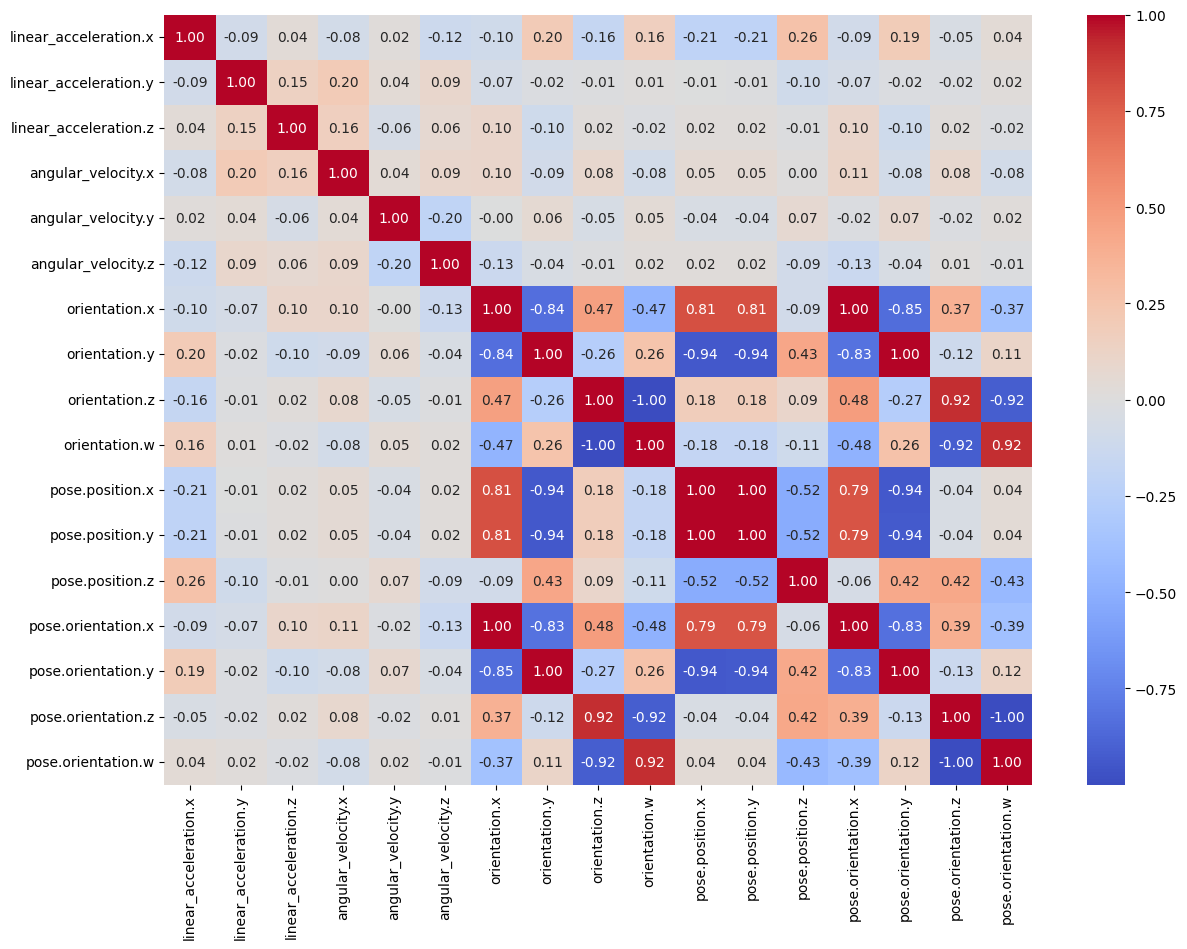

In [38]:
import seaborn as sns

corr_matrix = df_combined[imu_features + pose_targets].corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

Lets drop the obvious correlations *(pose.orientation.x and orientation.x, ect.)* and non-cross topic correlations *(pose.orientation.y and pose.orientation.x)*

<Axes: >

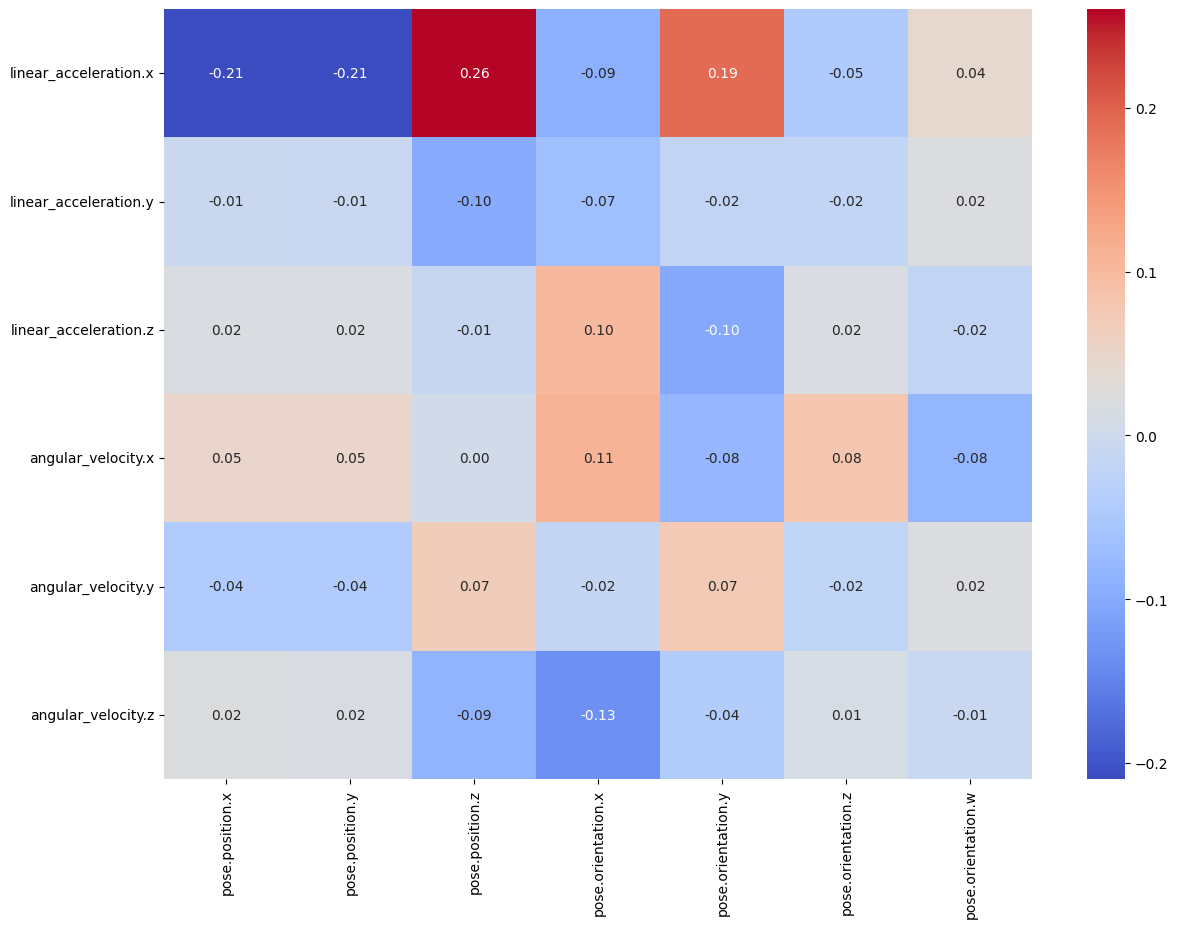

In [42]:
imu_features = ["linear_acceleration.x", "linear_acceleration.y", "linear_acceleration.z",
                "angular_velocity.x", "angular_velocity.y", "angular_velocity.z"]
corr_matrix = df_combined[imu_features + pose_targets].corr()
# Keep only correlations between IMU and Pose
corr_filtered = corr_matrix.loc[imu_features, pose_targets]
plt.figure(figsize=(14,10))
sns.heatmap(corr_filtered, annot=True, fmt=".2f", cmap="coolwarm")

With the highest coefficiant of 0.26 there likely isn't a simple linear correlation between the two.

Pivoting into regression model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features: IMU linear acceleration + angular velocity
imu_features = ["linear_acceleration.x", "linear_acceleration.y", "linear_acceleration.z",
                "angular_velocity.x", "angular_velocity.y", "angular_velocity.z"]

# Targets: Pose positions
pose_targets = ["pose.position.x", "pose.position.y", "pose.position.z"]

X = df_combined[imu_features]
y = df_combined[pose_targets]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
